<a href="https://colab.research.google.com/github/Sayan836/WebObjectDetection/blob/main/Web_Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**LOADING THE DATASET FROM DRIVE**

In [ ]:
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/Projects/Website Screenshots.v1-raw.yolov8.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/Dataset/')

**LOADING THE PRETRAINED YOLOv8 MODEL FROM ULTRALYTICS**

In [ ]:
!pip install ultralytics
from ultralytics import YOLO
import torch
model = YOLO("yolov8m.pt") #yolo model of medium size


**Model Architecture**

In [ ]:
model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(48, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(48, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(96, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(192, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_

**Traing the Yolo model on our Dataset**

In [ ]:
model.train(model="/content/yolov8m.pt",data="/content/Dataset/data.yaml",epochs=20)

Ultralytics YOLOv8.1.10 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/yolov8m.pt, data=/content/Dataset/data.yaml, epochs=20, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tru

100%|██████████| 755k/755k [00:00<00:00, 86.9MB/s]


Overriding model.yaml nc=80 with nc=8

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 202MB/s]


AMP: checks passed ✅


train: Scanning /content/Dataset/train/labels... 1688 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1688/1688 [00:01<00:00, 1542.48it/s]

train: WARNING ⚠️ /content/Dataset/train/images/9to5mac_com_png.rf.NcF4DV5kC6mqzV9v1jIZ.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/Dataset/train/images/9to5mac_com_png.rf.b280c437f46781de696d7057495c4bf9.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/Dataset/train/images/aka_ms_png.rf.8e0bfbf8e04642c2d5d2e0882fc16785.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/Dataset/train/images/aka_ms_png.rf.PG05f68F5wIfdDnoZRhT.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/Dataset/train/images/artstation_com_png.rf.00e9b1b2a87351418ec7b46deb925259.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/Dataset/train/images/artstation_com_png.rf.NjQJluMUiA8ypgE0HBVu.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/Dataset/train/images/bangordailynews_com_png.rf.71a2026d028805acb494f816f0d77c2f.jpg: 2 duplicate labels removed
train: WARNING ⚠️ /content/Dataset/train/images/bangordailynews_com_png.rf.dEhQaXlIpImyECm2ZzN8.jpg: 2 dupli

train: New cache created: /content/Dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/Dataset/valid/labels... 482 images, 0 backgrounds, 0 corrupt: 100%|██████████| 482/482 [00:00<00:00, 765.46it/s]

val: WARNING ⚠️ /content/Dataset/valid/images/bandsintown_com_png.rf.I19VlDFncZ0RifJhmfEU.jpg: 4 duplicate labels removed
val: WARNING ⚠️ /content/Dataset/valid/images/bandsintown_com_png.rf.b8462344187a5cdffe24d70019fabd0a.jpg: 4 duplicate labels removed
val: WARNING ⚠️ /content/Dataset/valid/images/deondernemer_nl_png.rf.c00a7c65fab4356b887dea5c9e96e8f3.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/Dataset/valid/images/deondernemer_nl_png.rf.mVLu7hIaZ8VUCwbhSF6c.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/Dataset/valid/images/flickr_com_png.rf.27963e0183770e78d58a8b78dc41715e.jpg: 2 duplicate labels removed
val: WARNING ⚠️ /content/Dataset/valid/images/flickr_com_png.rf.IKOHXY9vM9t5eOz75BGX.jpg: 2 duplicate labels removed
val: WARNING ⚠️ /content/Dataset/valid/images/foxnews_com_png.rf.10605c226e8ff71fd5510b806e5584b5.jpg: 2 duplicate labels removed
val: WARNING ⚠️ /content/Dataset/valid/images/foxnews_com_png.rf.ZBdjtZh9ZKXU8Tv9oXmU.jpg: 2 duplicate labels re

val: New cache created: /content/Dataset/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000833, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      10.4G      1.684      2.268      1.377        561        640: 100%|██████████| 106/106 [01:41<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:12<00:00,  1.30it/s]

                   all        482      20888      0.416      0.307      0.243      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      10.8G      1.439      1.785      1.266        638        640: 100%|██████████| 106/106 [01:21<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:10<00:00,  1.54it/s]


                   all        482      20888      0.412        0.3      0.235      0.148

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      10.3G      1.417      1.734      1.246        693        640: 100%|██████████| 106/106 [01:23<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:10<00:00,  1.52it/s]


                   all        482      20888      0.463      0.297      0.266       0.17

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      10.3G      1.372      1.713      1.228        774        640: 100%|██████████| 106/106 [01:21<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.63it/s]


                   all        482      20888      0.455       0.32      0.277      0.179

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      11.8G      1.325      1.654      1.201        659        640: 100%|██████████| 106/106 [01:21<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.38it/s]


                   all        482      20888      0.468      0.368      0.336      0.221

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      10.4G        1.3      1.612      1.191        382        640: 100%|██████████| 106/106 [01:21<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:10<00:00,  1.47it/s]


                   all        482      20888      0.473      0.359      0.314      0.209

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      11.2G      1.277      1.569      1.181        359        640: 100%|██████████| 106/106 [01:21<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.65it/s]


                   all        482      20888      0.367      0.345      0.313      0.213

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      11.8G      1.249      1.536      1.167        499        640: 100%|██████████| 106/106 [01:22<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.41it/s]


                   all        482      20888        0.5      0.354      0.327       0.22

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      9.98G      1.224      1.494      1.148        641        640: 100%|██████████| 106/106 [01:22<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:10<00:00,  1.46it/s]


                   all        482      20888      0.417      0.403      0.349      0.244

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      10.6G      1.201      1.483      1.149        428        640: 100%|██████████| 106/106 [01:20<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.65it/s]


                   all        482      20888      0.393      0.385      0.329      0.228
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20       9.9G      1.195      1.491      1.143        322        640: 100%|██████████| 106/106 [01:16<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:10<00:00,  1.53it/s]


                   all        482      20888      0.387      0.399      0.337      0.233

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      10.6G      1.178      1.423      1.133        250        640: 100%|██████████| 106/106 [01:07<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.68it/s]


                   all        482      20888      0.408      0.395      0.357      0.249

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      9.25G      1.153      1.384      1.122        299        640: 100%|██████████| 106/106 [01:07<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.64it/s]


                   all        482      20888      0.474      0.415      0.386      0.271

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20        10G      1.133       1.34      1.109        250        640: 100%|██████████| 106/106 [01:07<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.83it/s]


                   all        482      20888      0.516      0.381      0.369      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      8.75G      1.097      1.302      1.094        262        640: 100%|██████████| 106/106 [01:07<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.62it/s]


                   all        482      20888      0.448      0.397      0.389       0.28

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      10.2G      1.075      1.247      1.085        239        640: 100%|██████████| 106/106 [01:08<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.66it/s]


                   all        482      20888       0.49      0.393       0.39      0.282

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      9.76G       1.05      1.202      1.075        364        640: 100%|██████████| 106/106 [01:07<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.70it/s]


                   all        482      20888      0.403       0.42      0.386      0.278

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      9.55G      1.026      1.147       1.06        307        640: 100%|██████████| 106/106 [01:07<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.82it/s]


                   all        482      20888      0.492      0.397      0.389      0.281

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      9.71G      1.007      1.112      1.052        264        640: 100%|██████████| 106/106 [01:07<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.66it/s]


                   all        482      20888      0.455      0.413      0.389      0.283

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      9.06G     0.9795      1.056      1.043        412        640: 100%|██████████| 106/106 [01:07<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.61it/s]


                   all        482      20888      0.453       0.44      0.397      0.292

20 epochs completed in 0.494 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.10 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25844392 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  19%|█▉        | 3/16 [00:07<00:33,  2.61s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:34<00:00,  2.15s/it]


                   all        482      20888      0.449      0.435      0.392      0.288
                button        482       6354      0.501      0.466      0.448       0.31
                 field        482        366      0.549      0.664      0.644      0.542
               heading        482       1508       0.37      0.521      0.391      0.255
                iframe        482        158      0.322      0.304      0.234      0.201
                 image        482       3766      0.557      0.503      0.502      0.359
                 label        482         34      0.416      0.294      0.226      0.189
                  link        482       2654       0.45      0.362       0.36      0.256
                  text        482       6048      0.428      0.365      0.335      0.195
Speed: 0.3ms preprocess, 8.2ms inference, 0.0ms loss, 15.5ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b10fe21bb50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,

**Evaluation Metrics and Visualisations**

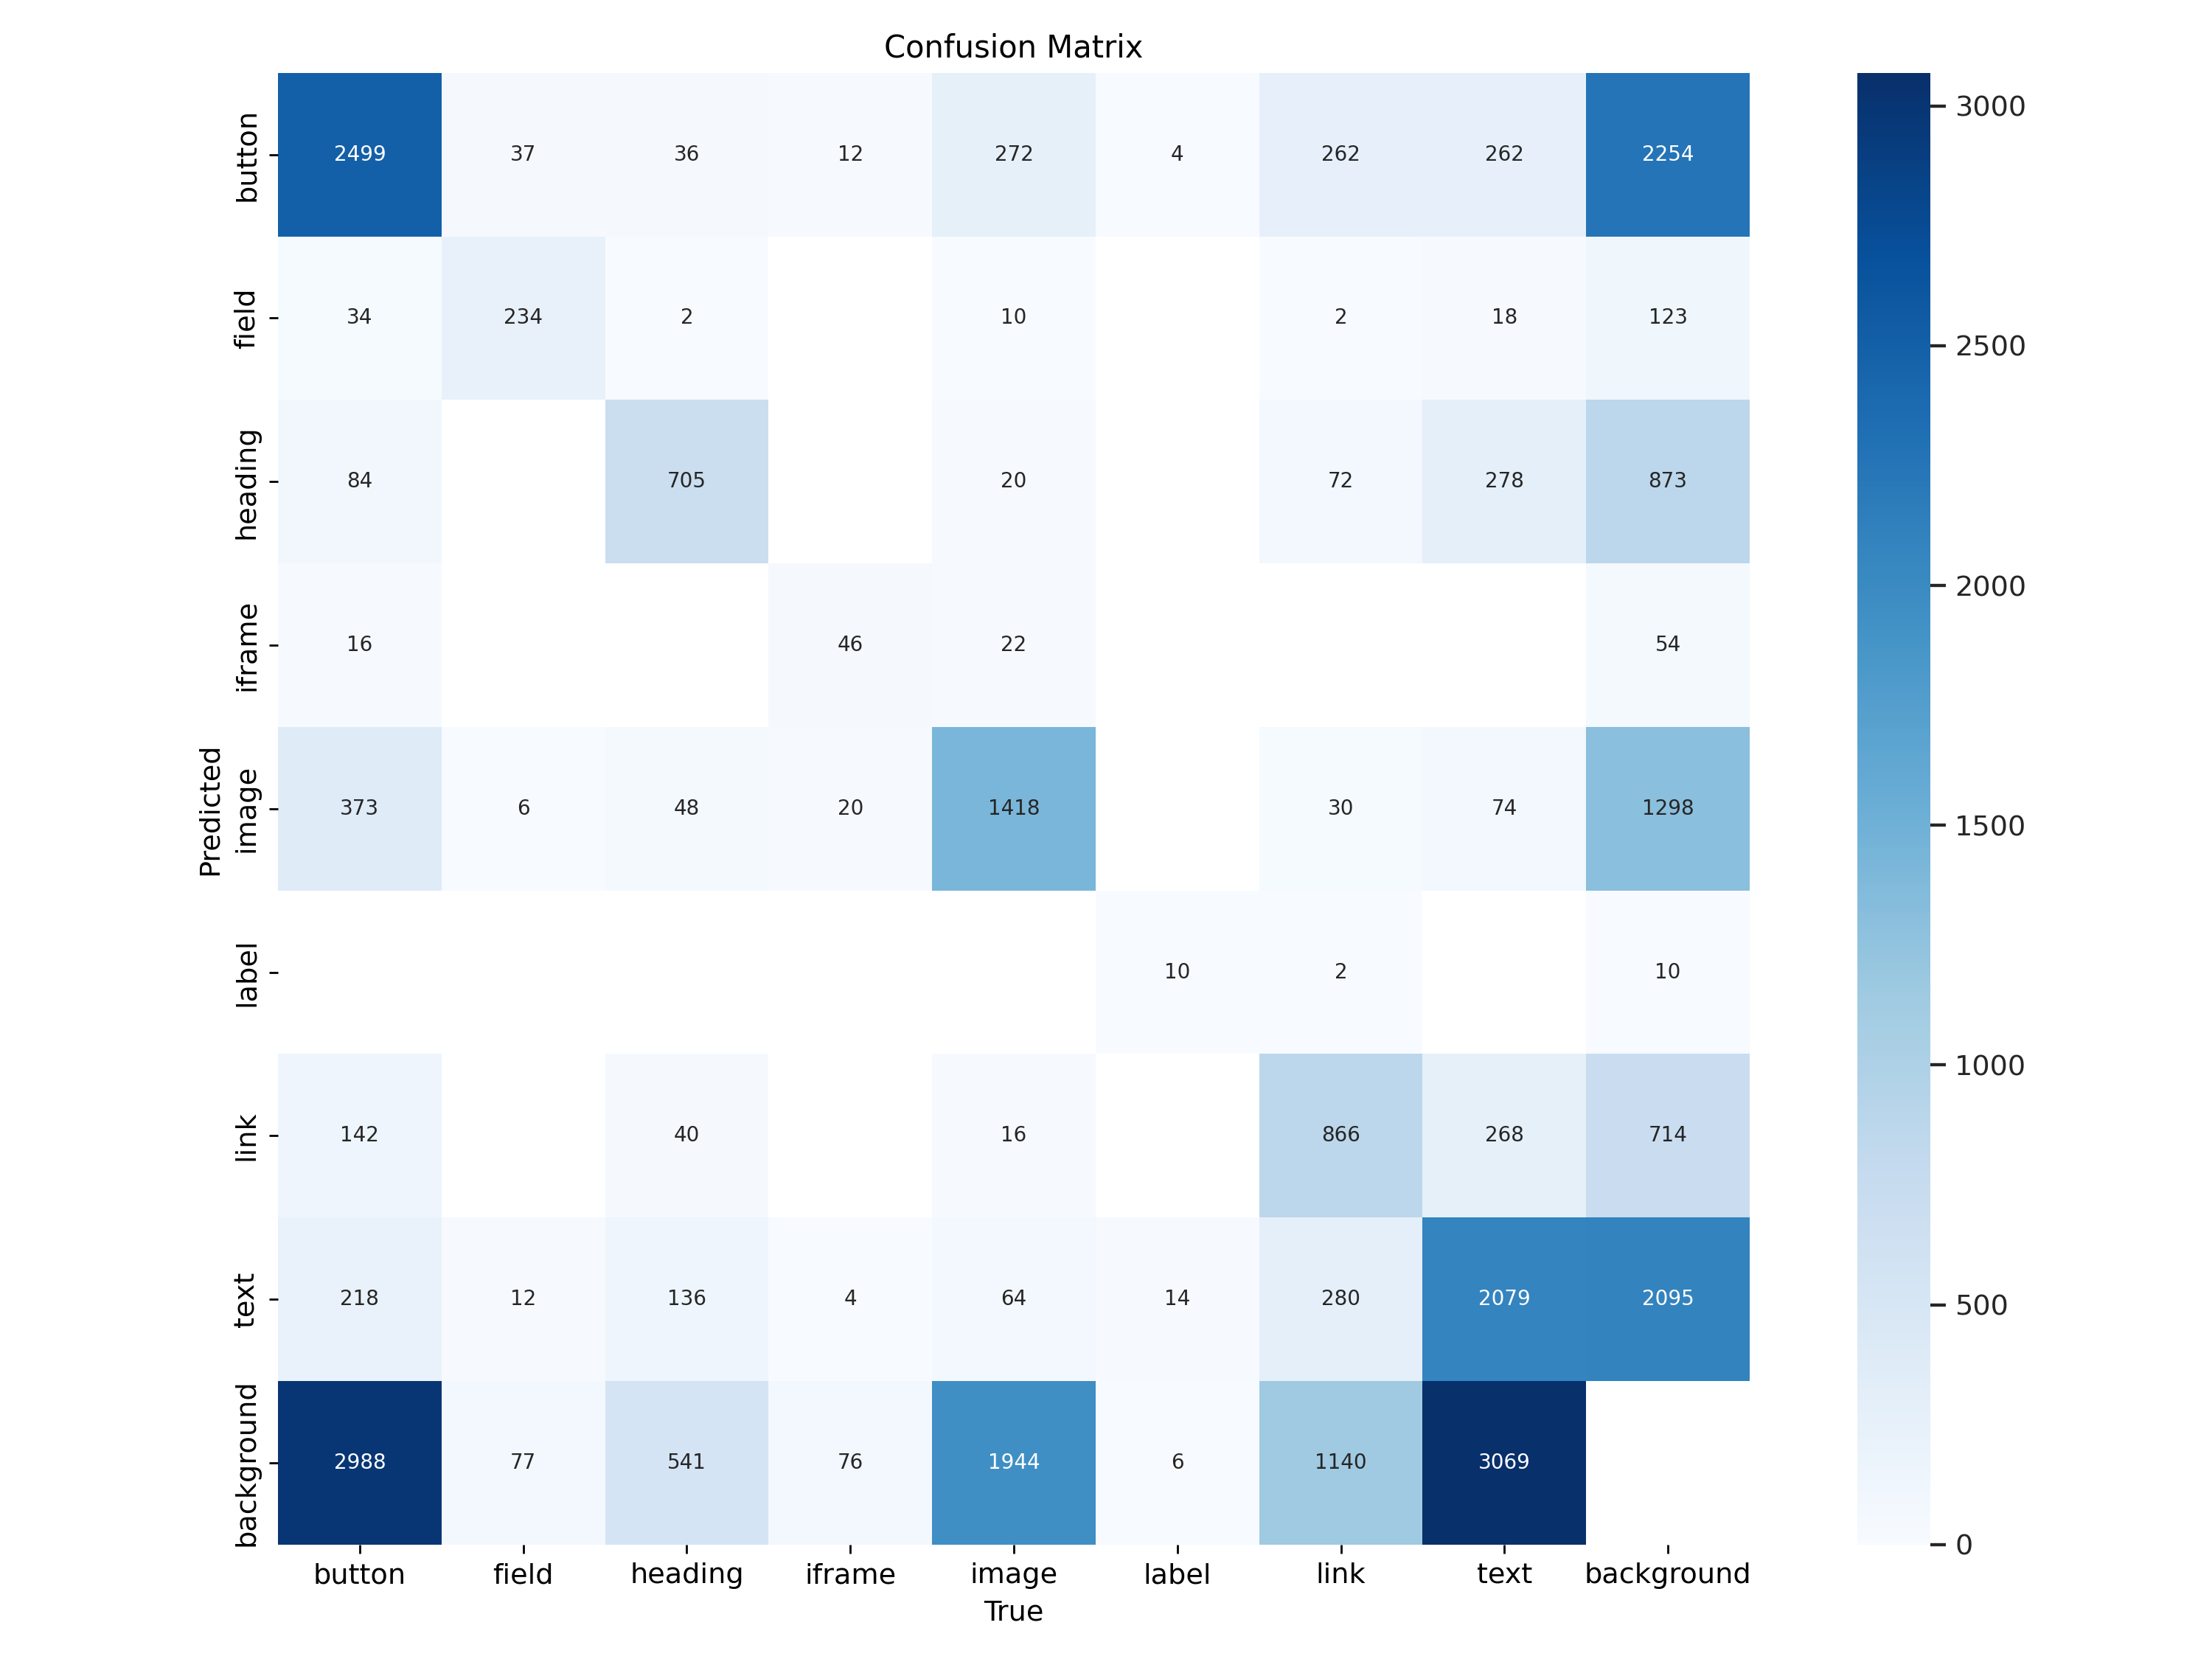

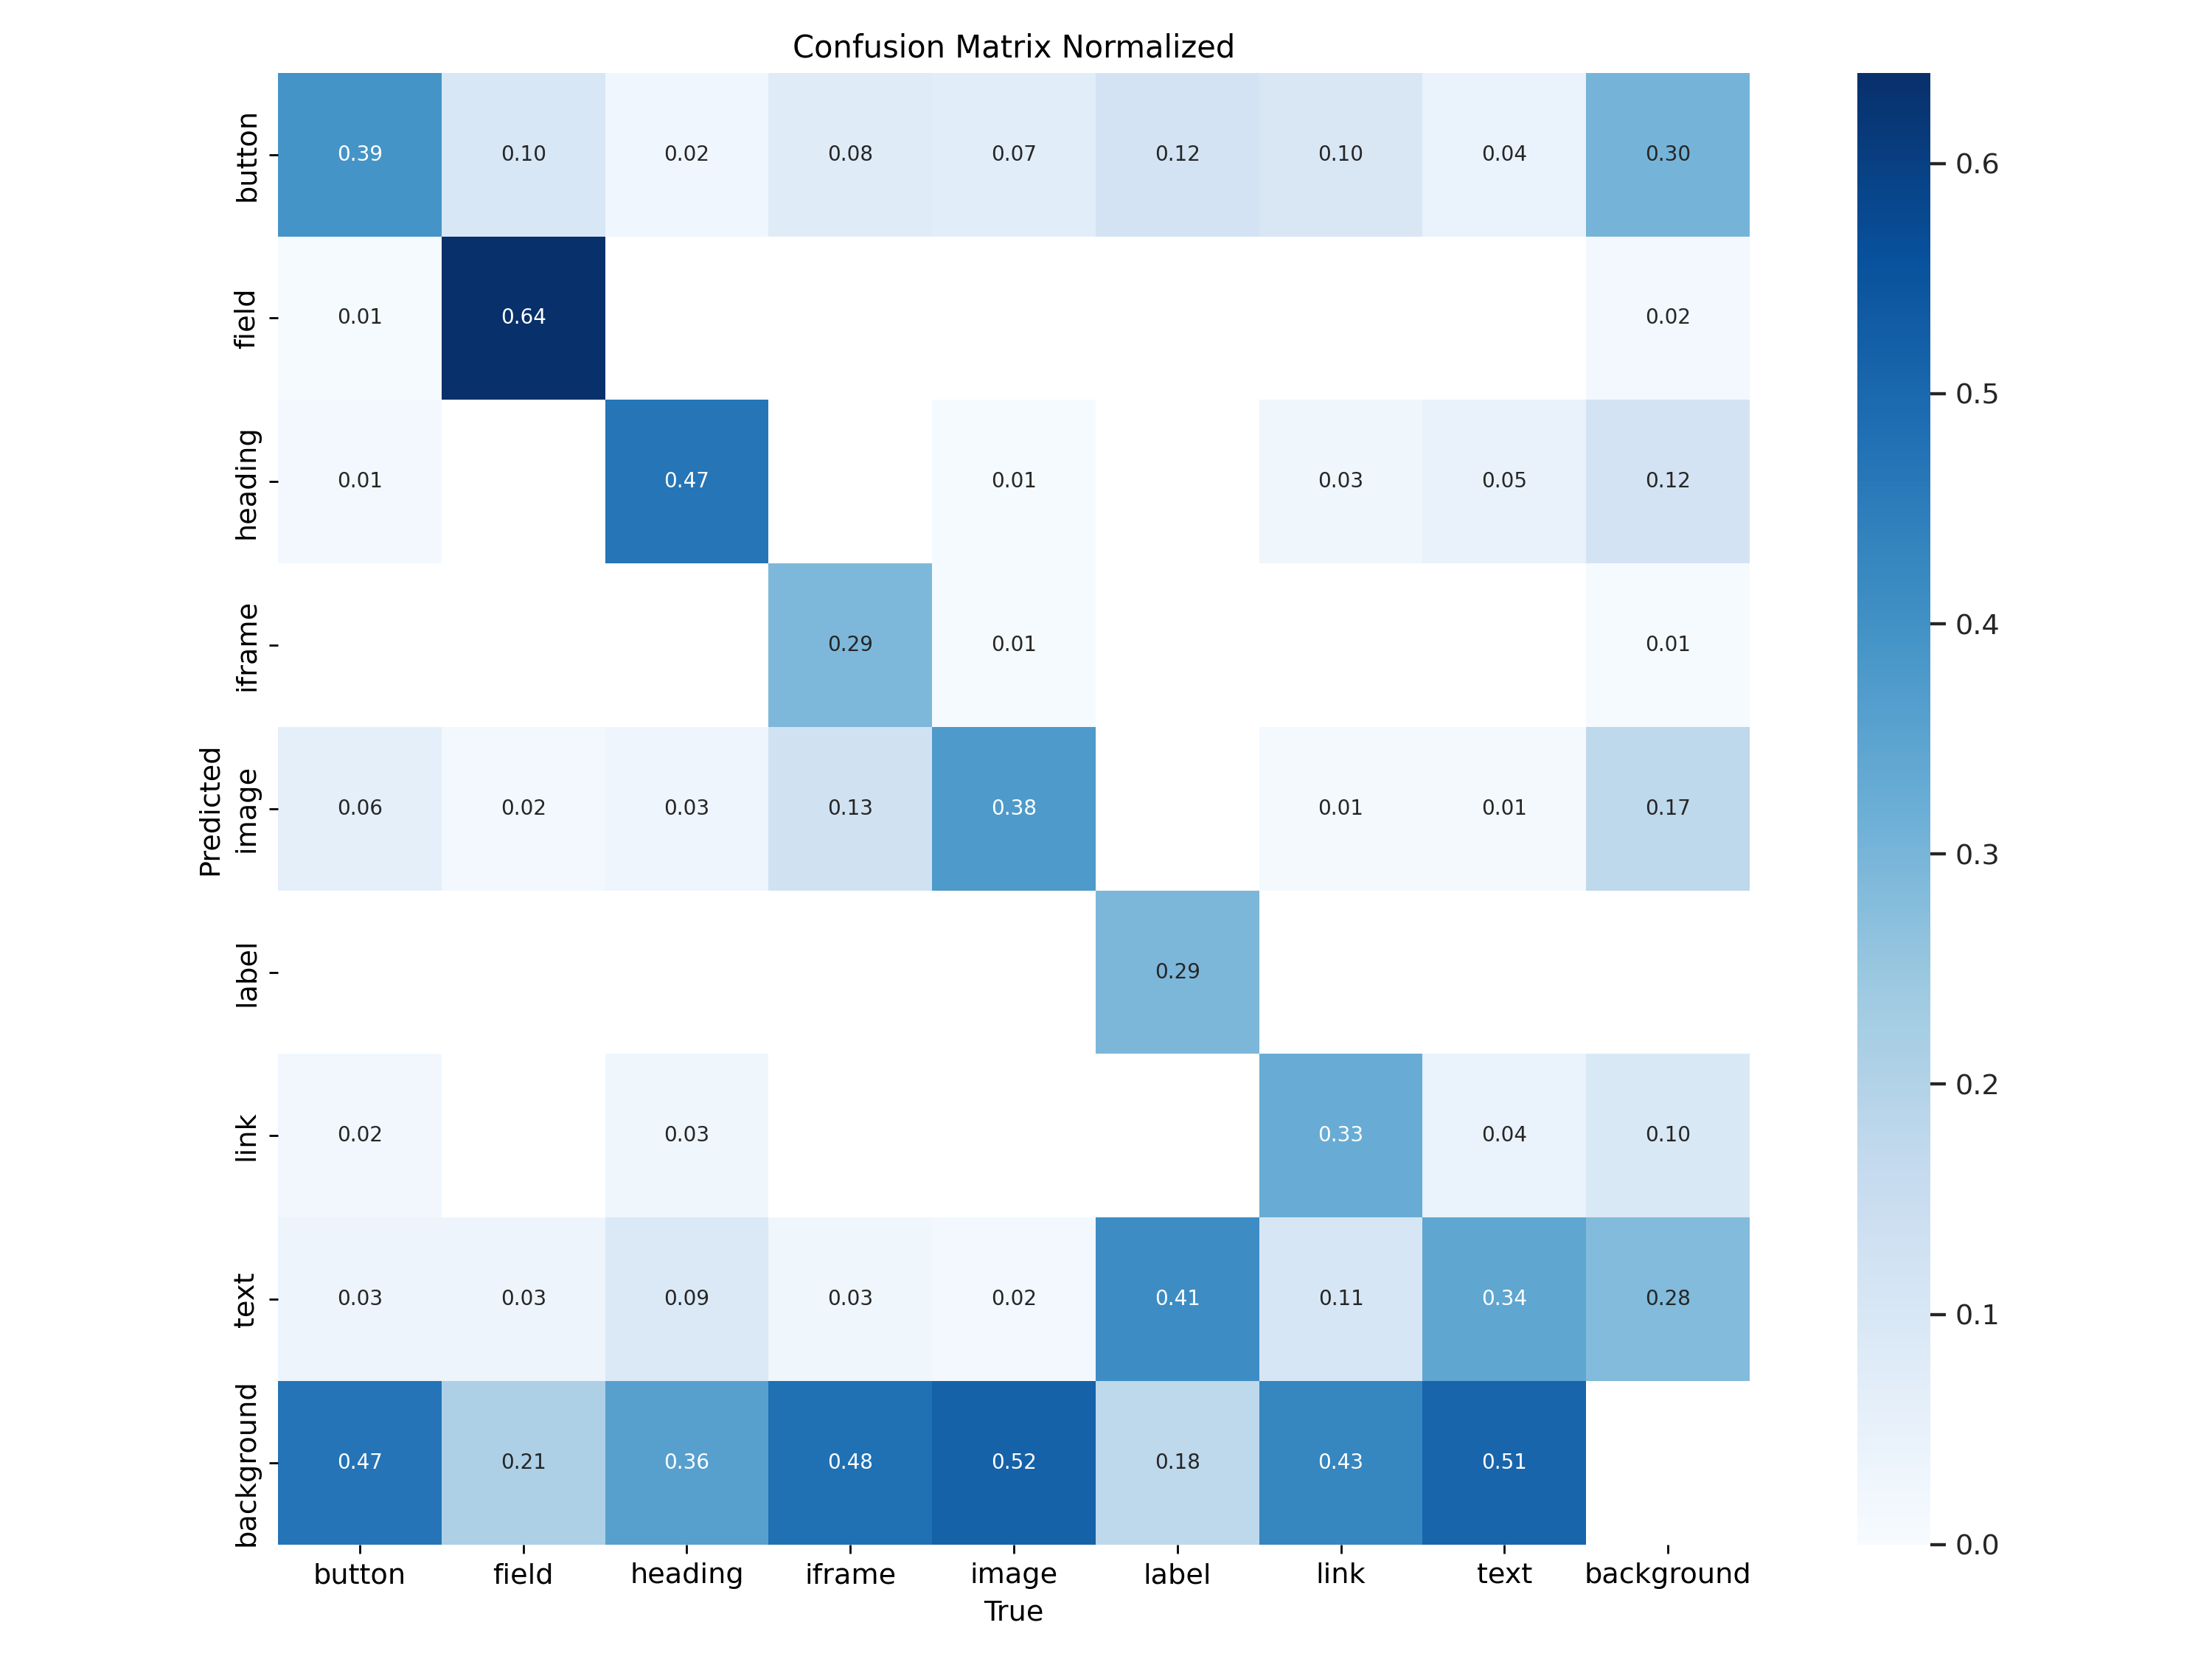

In [ ]:
from IPython.display import Image, display


img_path1 = '/content/runs/detect/train/confusion_matrix.png'
img_path2= '/content/runs/detect/train/confusion_matrix_normalized.png'
img_path3= '/content/runs/detect/train/results.png'
display(Image(filename=img_path1))
display(Image(filename=img_path2))


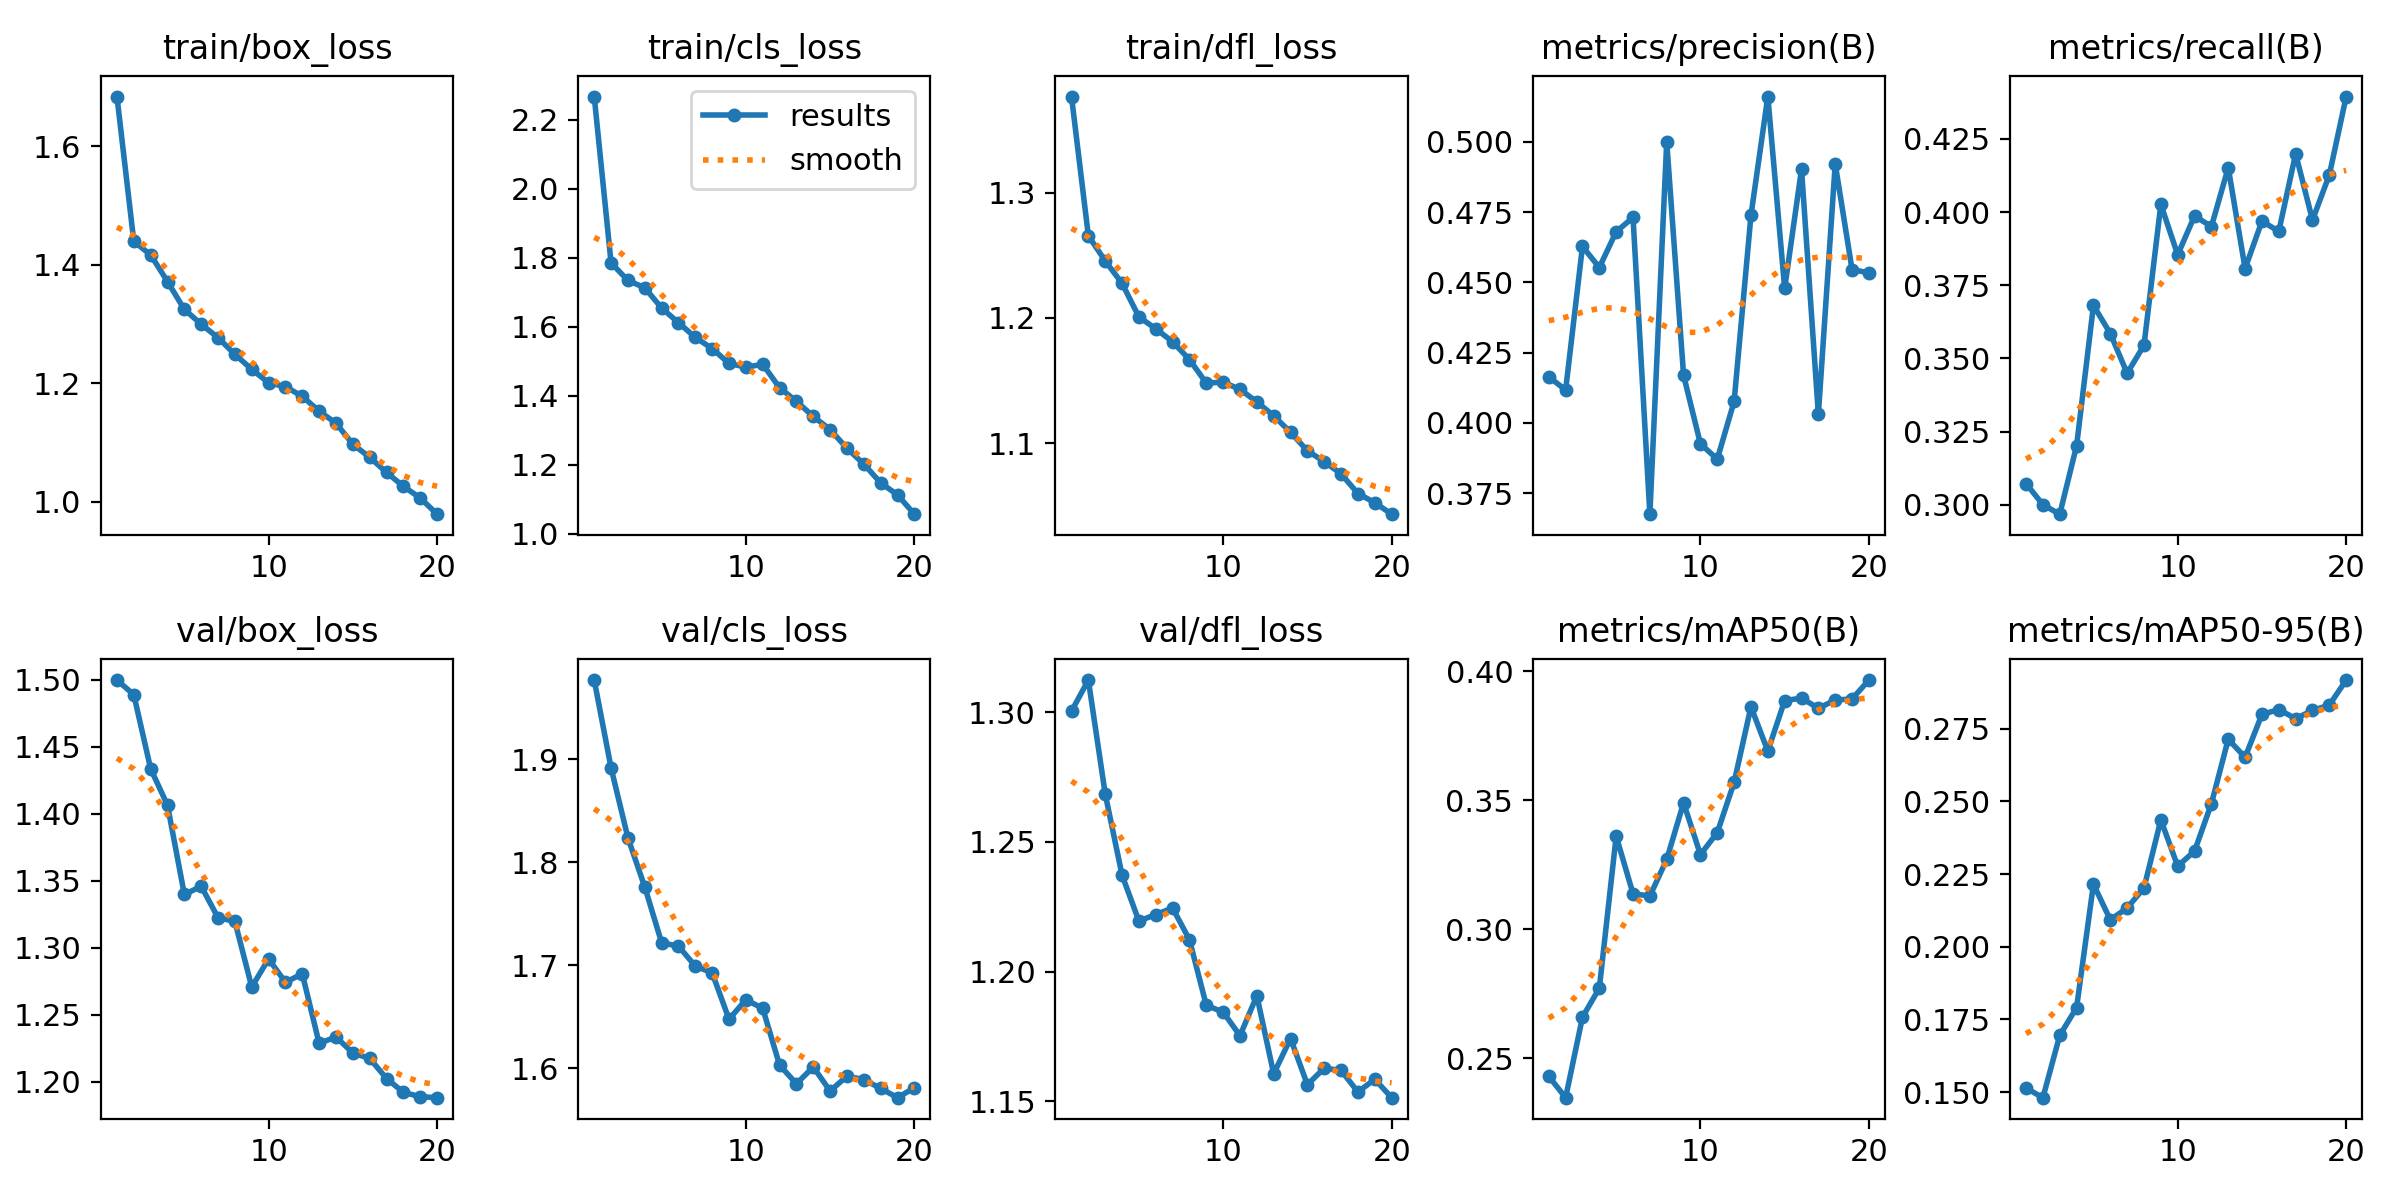

In [ ]:
display(Image(filename=img_path3))

**Validating the trained model to the images which it has not seen**

In [ ]:
model.val(model='/content/runs/detect/train/weights/best.pt',data='/content/Dataset/data.yaml')

Ultralytics YOLOv8.1.10 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/Dataset/valid/labels.cache... 482 images, 0 backgrounds, 0 corrupt: 100%|██████████| 482/482 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/Dataset/valid/images/bandsintown_com_png.rf.I19VlDFncZ0RifJhmfEU.jpg: 4 duplicate labels removed
val: WARNING ⚠️ /content/Dataset/valid/images/bandsintown_com_png.rf.b8462344187a5cdffe24d70019fabd0a.jpg: 4 duplicate labels removed
val: WARNING ⚠️ /content/Dataset/valid/images/deondernemer_nl_png.rf.c00a7c65fab4356b887dea5c9e96e8f3.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/Dataset/valid/images/deondernemer_nl_png.rf.mVLu7hIaZ8VUCwbhSF6c.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/Dataset/valid/images/flickr_com_png.rf.27963e0183770e78d58a8b78dc41715e.jpg: 2 duplicate labels removed
val: WARNING ⚠️ /content/Dataset/valid/images/flickr_com_png.rf.IKOHXY9vM9t5eOz75BGX.jpg: 2 duplicate labels removed
val: WARNING ⚠️ /content/Dataset/valid/images/foxnews_com_png.rf.10605c226e8ff71fd5510b806e5584b5.jpg: 2 duplicate labels removed
val: WARNING ⚠️ /content/Dataset/valid/images/foxnews_com_png.rf.ZBdjtZh9ZKXU8Tv9oXmU.jpg: 2 duplicate labels re


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  16%|█▌        | 5/31 [00:18<01:56,  4.50s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:40<00:00,  1.31s/it]


                   all        482      20888      0.453      0.439      0.397      0.292
                button        482       6354      0.503      0.473      0.455      0.316
                 field        482        366      0.556      0.672      0.654      0.555
               heading        482       1508      0.375      0.531      0.401      0.262
                iframe        482        158      0.319      0.304      0.233        0.2
                 image        482       3766      0.556      0.504      0.504      0.362
                 label        482         34      0.436      0.294      0.226      0.188
                  link        482       2654      0.453      0.365      0.364      0.258
                  text        482       6048      0.431      0.368      0.336      0.196
Speed: 0.4ms preprocess, 16.5ms inference, 0.0ms loss, 13.5ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b12c62fe170>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,

**Confusion matrix on validation dataset**

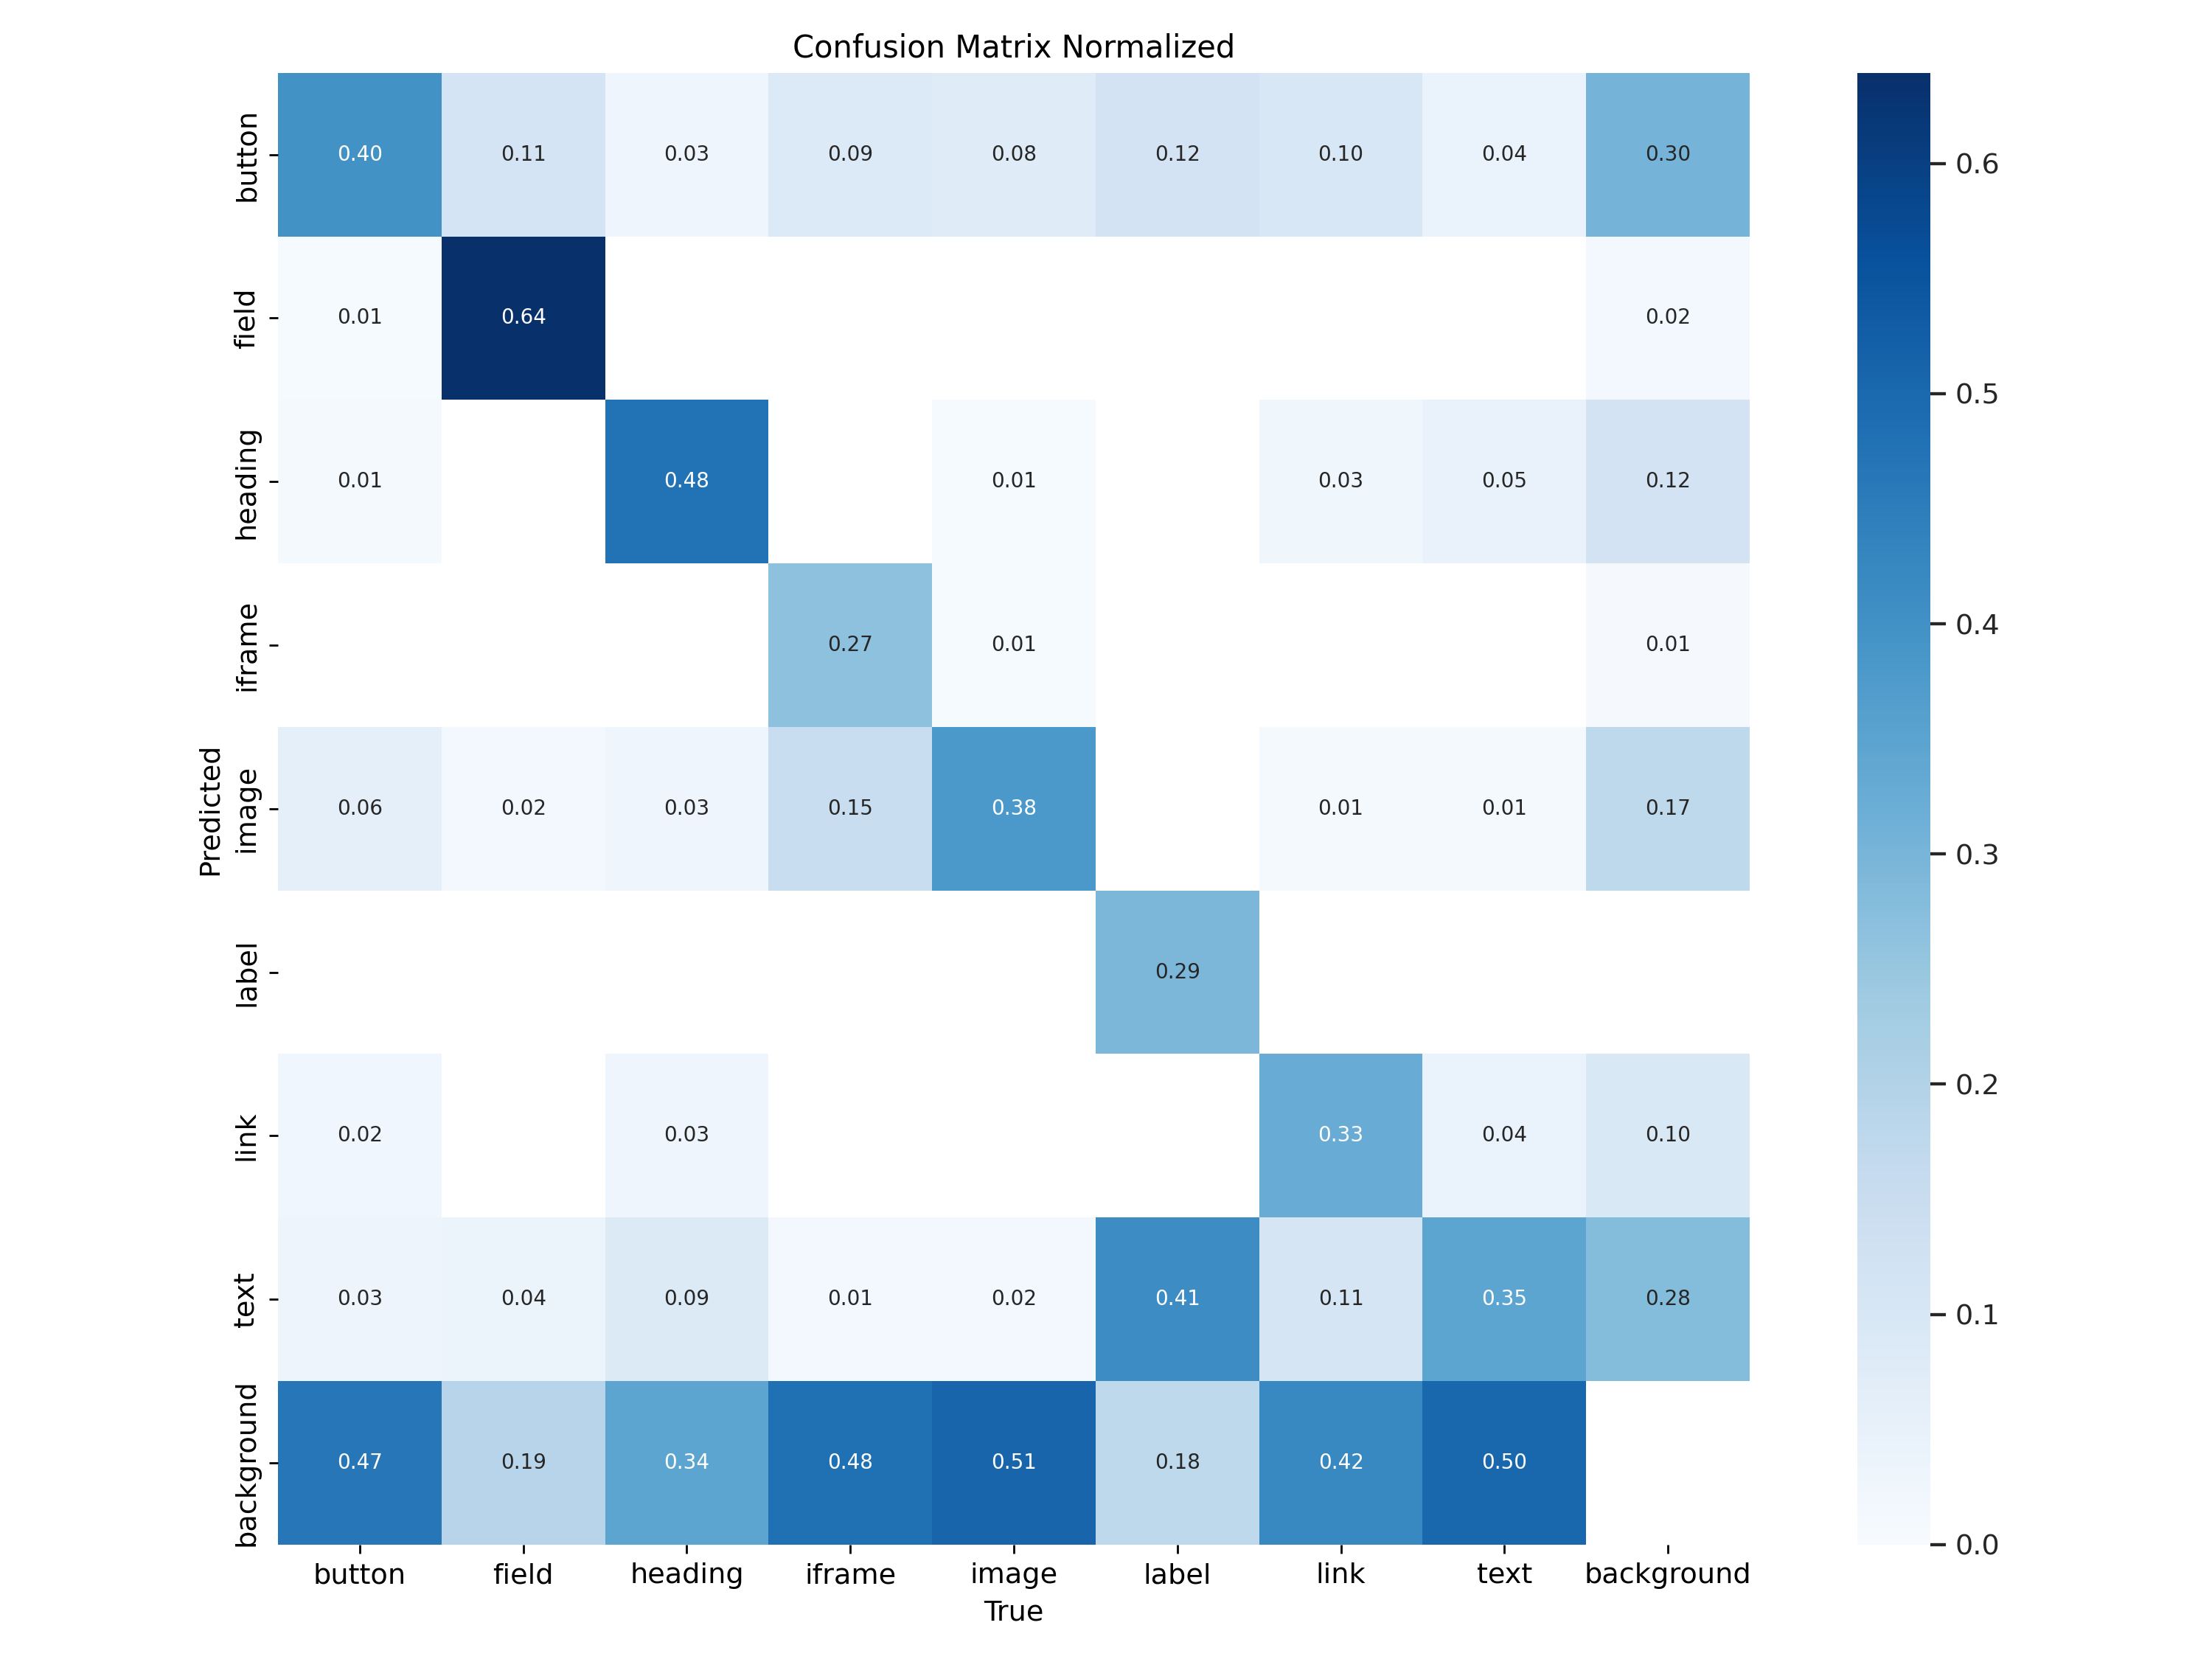

In [ ]:
display(Image('/content/runs/detect/train2/confusion_matrix_normalized.png'))

**Testing the Trained Model on RealTime Images**

Before detection:


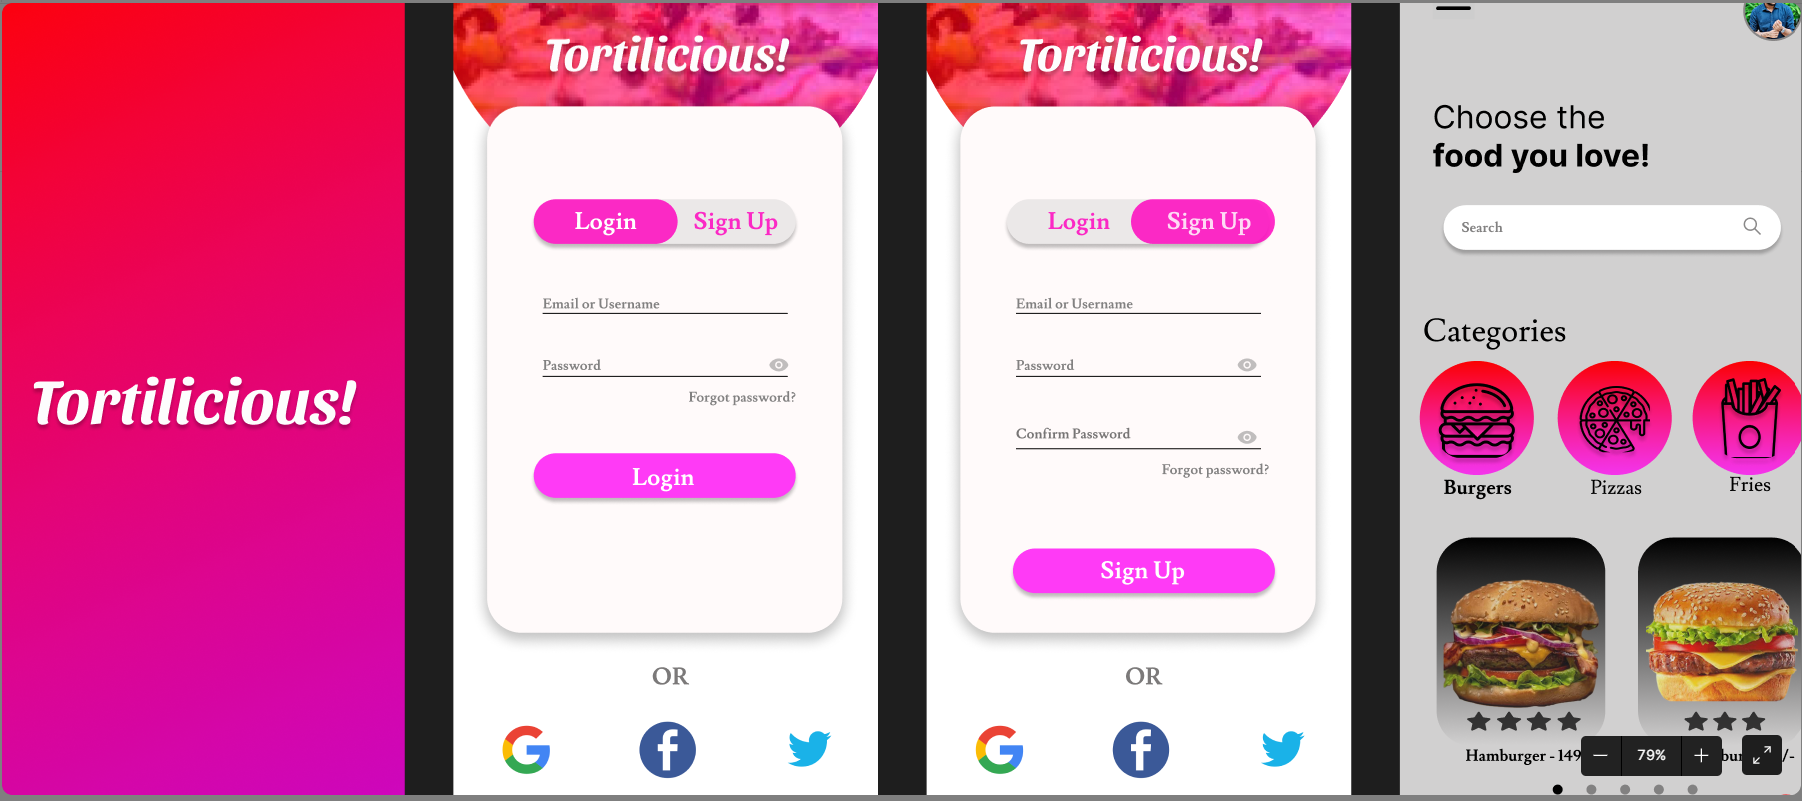

In [ ]:
figma_img='/content/Screenshot 2024-02-07 205145.png'
print("Before detection:")
display(Image(figma_img))

In [ ]:
import cv2
img=cv2.imread('/content/test_images/Screenshot 2024-02-07 205145.png')
img=cv2.resize(img,(640,640))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.imwrite('/content/test_images/Screenshot 2024-02-07 205145.png',img)
model.predict(model="/content/runs/detect/train/weights/best.pt",data='/content/Dataset/data.yaml')

In [ ]:
class Prediction():
  def __init__(self,model_path,img_path):
    self.model=YOLO(model_path)
    self.img_path=img_path

  def get_img(self):
    img=cv2.imread(self.img_path)
    img=cv2.resize(img,(640,640))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    cv2.imwrite(self.img_path,img)
    return img

  def predict(self):
    results=self.model.predict("/content/test_images/Screenshot 2024-02-07 205145.png")
    result = results[0]
    return result

  def draw_boxes(self,image, boxes):
    for box in boxes:
        (x, y, w, h,label,prob) = box
        # Convert x, y, w, h to integers
        x, y, w, h = int(x), int(y), int(w), int(h)

        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        # Draw the bounding box on the image
        cv2.rectangle(image, (x, y), (w,h), (0, 255, 0), 2)  # BGR color: (0, 255, 0) for green
        # Display class label and probability
        label_text = f'{label}: {prob:.2f}'
        cv2.putText(image, label_text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1, cv2.LINE_AA)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        cv2.imwrite("/content/detected_img.png",image)

# Display the image with bounding boxes, labels, and probabilities
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

  def generate(self):
    img=self.get_img()
    result=self.predict()
    output = []
    for box in result.boxes:
      x1, y1, x2, y2 = [
      round(x) for x in box.xyxy[0].tolist()
      ]
      class_id = box.cls[0].item()
      prob = round(box.conf[0].item(), 2)
      output.append([
      x1, y1, x2, y2, result.names[class_id], prob
      ])
    #print(output)
    self.draw_boxes(img,output)




**Detected objects in our test image**


image 1/1 /content/test_images/Screenshot 2024-02-07 205145.png: 640x640 5 buttons, 4 fields, 1 heading, 7 images, 1 label, 6 texts, 37.2ms
Speed: 1.9ms preprocess, 37.2ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)


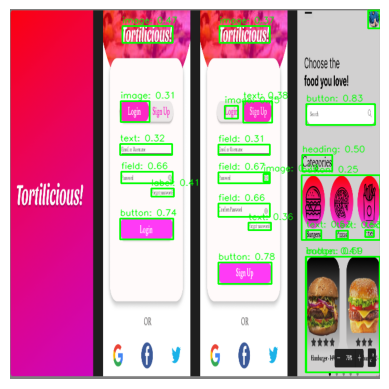

In [ ]:
prediction=Prediction("/content/runs/detect/train/weights/best.pt","/content/test_images/Screenshot 2024-02-07 205145.png")
prediction.generate()